In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox,AnchoredOffsetbox

In [2]:
data = pd.read_csv("cleaned_data.csv")

In [3]:
data.head()

,statement,source,link,veracity,year,renamed_veracity,statement_mod
0,"Says that in 1770 ""British parliament banned l...",Facebook posts,/facebook-fact-checks/statements/2019/oct/25/f...,Pants on Fire!,2019,pants-fire,"that in 1770 ""British parliament banned lipsti..."
1,"Says Ann Landers said, ""At age 20, we worry ab...",Viral image,/facebook-fact-checks/statements/2019/oct/25/v...,False,2019,false,"Ann Landers said, ""At age 20, we worry about w..."
2,"""General Motors is making record profits.""",Glenn Kage,/missouri/statements/2019/oct/25/glenn-kage/ge...,Half-True,2019,half-true,"""General Motors is making record profits."""
3,"""14,000 abandoned wind turbines litter the Uni...",Chain email,/missouri/statements/2019/oct/25/chain-email/n...,Pants on Fire!,2019,pants-fire,"""14,000 abandoned wind turbines litter the Uni..."
4,"Says Congress gave Wall Street ""trillions of d...",Bernie Sanders,/truth-o-meter/statements/2019/oct/25/bernie-s...,Half-True,2019,half-true,"Congress gave Wall Street ""trillions of dollar..."


# <b> Data Viz Task 1 </b>
Display average sentence length,total number of words per data point,number of sentences, etc. (not just the whole dataset, but also across veracity labels) 

In [4]:
# Get the number of sentences
for index, row in data.iterrows():
    sentences = row.statement.split(". ")
    sentences = [s for s in sentences if len(s.split(" ")) != 1
                 ]  # to avoid words like "Sen. " being counted as sentences
    sentences = [
        s for s in sentences
        if not s.translate(str.maketrans('', '', string.punctuation)) == ""
    ]  # to avoid ellipsis being counted as a sentence
    data.loc[index, "num_sentences"] = len(sentences)

# Get total number of words per data point(includes numbers too)
for index, row in data.iterrows():
    data.loc[index, "total_words"] = len(row.statement.split(" "))

In [5]:
data["num_sentences"].value_counts()

1.0    13716
2.0     2532
3.0      383
4.0       95
5.0       14
6.0        5
7.0        3
8.0        2
Name: num_sentences, dtype: int64

## <b>High level stats (across entire database)</b>

In [6]:
print("Total number of sentences in the dataset = ", data.num_sentences.sum())

Total number of sentences in the dataset =  20446.0


In [7]:
print(
    f"Avg number of words per data point = {round(data.total_words.mean(), 2)}"
)

Avg number of words per data point = 18.19


In [8]:
print(
    f"Avg sentence length = {round(data.total_words.sum()/data.num_sentences.sum(), 2)} words"
)

Avg sentence length = 14.9 words


## <b> Stats across veracity labels </b>

In [9]:
data.renamed_veracity.value_counts()

false           3424
half-true       3196
mostly-true     3045
mostly-false    2755
true            2359
pants-fire      1895
barely-true       76
Name: renamed_veracity, dtype: int64

In [10]:
# Get these levels in order
veracity_levels = [
    "true", "mostly-true", "half-true", "barely-true", "mostly-false", "false",
    "pants-fire"
]

<b>Data points across veracity levels</b>

In [11]:
# Get the number of observations for each veracity level
num_obs = []
for vl in veracity_levels:
    num_obs.append(data[data.renamed_veracity == vl].shape[0])

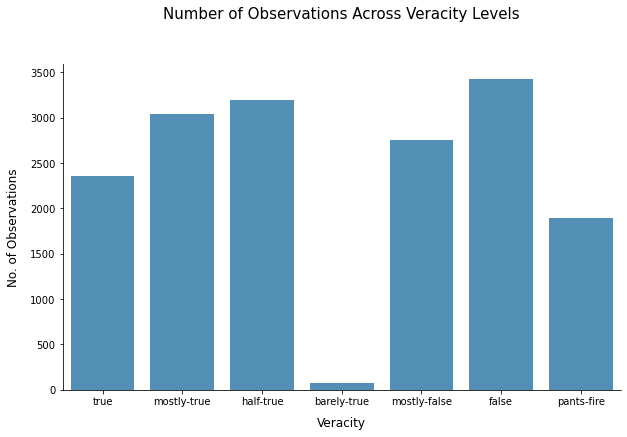

In [12]:
# Plot the number of observations per veracity label

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=veracity_levels, y=num_obs, ax=ax, color="#4292c6")
ax.set_xlabel("Veracity", fontdict={"size": 12}, labelpad=10)
ax.set_ylabel("No. of Observations", fontdict={"size": 12}, labelpad=10)
ax.set_title("Number of Observations Across Veracity Levels",
             fontdict={"size": 15},
             pad=45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.8)
ax.spines["bottom"].set_linewidth(0.8)
plt.show()

<b>Average sentence length across veracity levels</b>

In [13]:
# Get average sentence length for each veracity label
avg_sentence_len = []
for vl in veracity_levels:
    asl = data[data.renamed_veracity == vl].total_words.sum() / data[
        data.renamed_veracity == vl].num_sentences.sum()
    avg_sentence_len.append(asl)

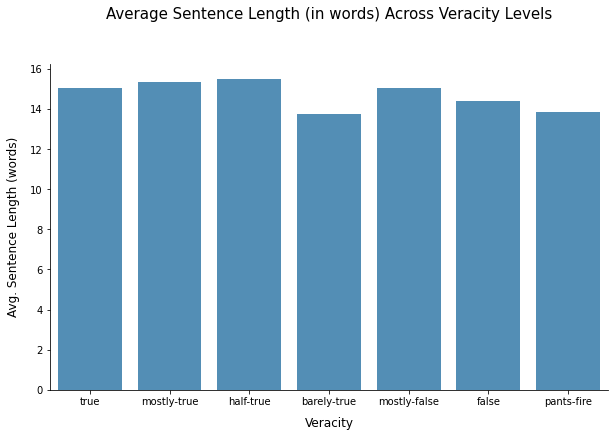

In [14]:
# Plot the average sentence length per veracity label

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=veracity_levels, y=avg_sentence_len, ax=ax, color="#4292c6")
ax.set_xlabel("Veracity", fontdict={"size": 12}, labelpad=10)
ax.set_ylabel("Avg. Sentence Length (words)",
              fontdict={"size": 12},
              labelpad=10)
ax.set_title("Average Sentence Length (in words) Across Veracity Levels",
             fontdict={"size": 15},
             pad=45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.8)
ax.spines["bottom"].set_linewidth(0.8)
plt.show()

<b>Total number of sentences across veracity levels</b>

In [15]:
# Get total number of sentences for each veracity label
num_sentences = []
for vl in veracity_levels:
    num_sentences.append(data[data.renamed_veracity == vl].num_sentences.sum())

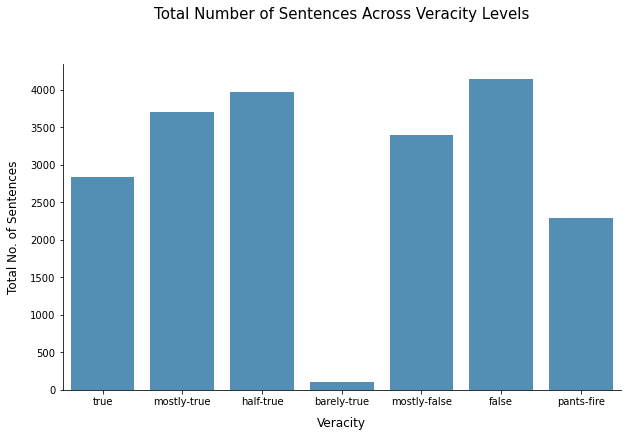

In [16]:
# Plot the total number of sentences per veracity label

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=veracity_levels, y=num_sentences, ax=ax, color="#4292c6")
ax.set_xlabel("Veracity", fontdict={"size": 12}, labelpad=10)
ax.set_ylabel("Total No. of Sentences", fontdict={"size": 12}, labelpad=10)
ax.set_title("Total Number of Sentences Across Veracity Levels",
             fontdict={"size": 15},
             pad=45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.8)
ax.spines["bottom"].set_linewidth(0.8)
plt.show()

<b>Number of words per data point across veracity levels</b>

In [17]:
# Get the avg number of words per data point for each veracity label
avg_words_per_datapoint = []
for vl in veracity_levels:
    words_per_datapoint = data[data.renamed_veracity == vl].total_words.sum(
    ) / data[data.renamed_veracity == vl].shape[0]
    avg_words_per_datapoint.append(words_per_datapoint)

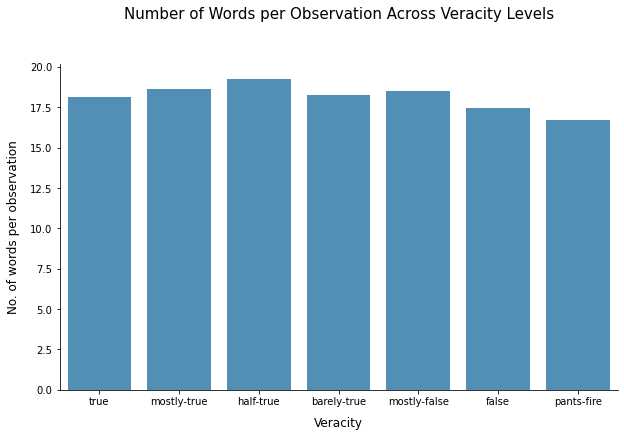

In [18]:
# Plot the avg number of words per datapoint per veracity label

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=veracity_levels,
                 y=avg_words_per_datapoint,
                 ax=ax,
                 color="#4292c6")
ax.set_xlabel("Veracity", fontdict={"size": 12}, labelpad=10)
ax.set_ylabel("No. of words per observation",
              fontdict={"size": 12},
              labelpad=10)
ax.set_title("Number of Words per Observation Across Veracity Levels",
             fontdict={"size": 15},
             pad=45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.8)
ax.spines["bottom"].set_linewidth(0.8)
plt.show()

# <b> Data Viz Task 2 </b>

word cloud (because everyone loves word clouds and they may reveal something interesting about the data)

In [19]:
stop_words = stopwords.words('english')
stop_words.extend(['say', 'says', 'said'])

<b>Word cloud for veracity label `true`</b>

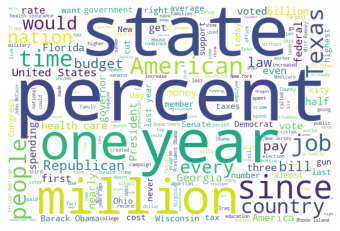

In [20]:
text = data[data.renamed_veracity == 'true'].statement.str.cat(sep=' ')
wordcloud = WordCloud(background_color='white',
                      height=400,
                      width=600,
                      stopwords=stop_words)
wordcloud = wordcloud.generate(text, )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<b>Word cloud for veracity label `pants-fire`</b>

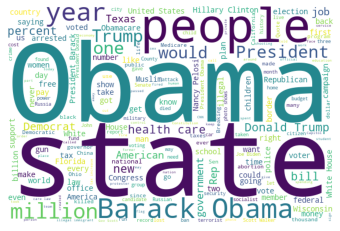

In [21]:
text = data[data.renamed_veracity == 'pants-fire'].statement.str.cat(sep=' ')
wordcloud = WordCloud(background_color='white',
                      height=400,
                      width=600,
                      stopwords=stop_words)
wordcloud = wordcloud.generate(text, )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<b>Word cloud for veracity label `false`</b>

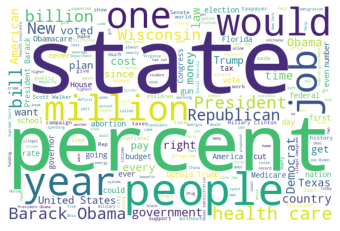

In [22]:
text = data[data.renamed_veracity == 'false'].statement.str.cat(sep=' ')
wordcloud = WordCloud(background_color='white',
                      height=400,
                      width=600,
                      stopwords=stop_words)
wordcloud = wordcloud.generate(text, )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Viz Task 3

Label distribution of top sources

In [23]:
# identify the top sources
top_5_sources = data.source.value_counts()[:5].index
data.source.value_counts()[:5]

Donald Trump       816
Barack Obama       600
Bloggers           502
Facebook posts     339
Hillary Clinton    297
Name: source, dtype: int64

In [24]:
# Get the distribution of labels across top 5 sources
label_distributions = []
for source in top_5_sources:
    distribution = []
    temp_df = data[data.source == source]
    for vl in veracity_levels:
        distribution.append(
            len(temp_df[temp_df.renamed_veracity == vl]) * 100 / len(temp_df))
    label_distributions.append(distribution)

In [25]:
colors = [
    '#8c510a', '#d8b365', '#f6e8c3', '#f5f5f5', '#c7eae5', '#5ab4ac', '#01665e'
]
colors = list(reversed(colors))

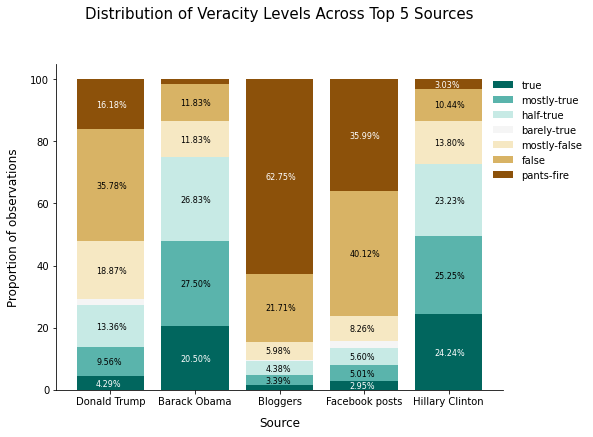

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
for i, vl in enumerate(veracity_levels):
    if i == 0:
        bottom = [0] * len(top_5_sources)
    else:
        bottom = []
        for ld in label_distributions:
            bottom.append(sum(ld[:i]))
    ax.bar(x=top_5_sources,
           height=[ld[i] for ld in label_distributions],
           bottom=bottom,
           color=colors[i],
           label=vl)

for i, source in enumerate(top_5_sources):
    for j, vl in enumerate(veracity_levels):
        if j == 0:
            y_offset = label_distributions[i][j] * 0.5 - 1
        else:
            y_offset = sum(label_distributions[i]
                           [:j]) + label_distributions[i][j] * 0.5 - 1
        if j == 0 or j == 6:
            color = "white"
        else:
            color = "black"
        if not label_distributions[i][j] < 2.5:
            ax.text(x=i - 0.17,
                    y=y_offset,
                    s=f"{label_distributions[i][j]:.2f}%",
                    size=8,
                    color=color)

ax.set_xlabel("Source", fontdict={"size": 12}, labelpad=10)
ax.set_ylabel("Proportion of observations", fontdict={"size": 12}, labelpad=10)
ax.set_title("Distribution of Veracity Levels Across Top 5 Sources",
             fontdict={"size": 15},
             pad=45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.8)
ax.spines["bottom"].set_linewidth(0.8)
ax.legend(loc=(0.97, 0.63), frameon=False).set_visible(True)
plt.show()

In [27]:
image_list = [('trump.png',0.2), ('obama.png', 0.2), ('blog.png', 0.1), ('fb.png', 0.2), ('hillary_clinton.png',0.3)]

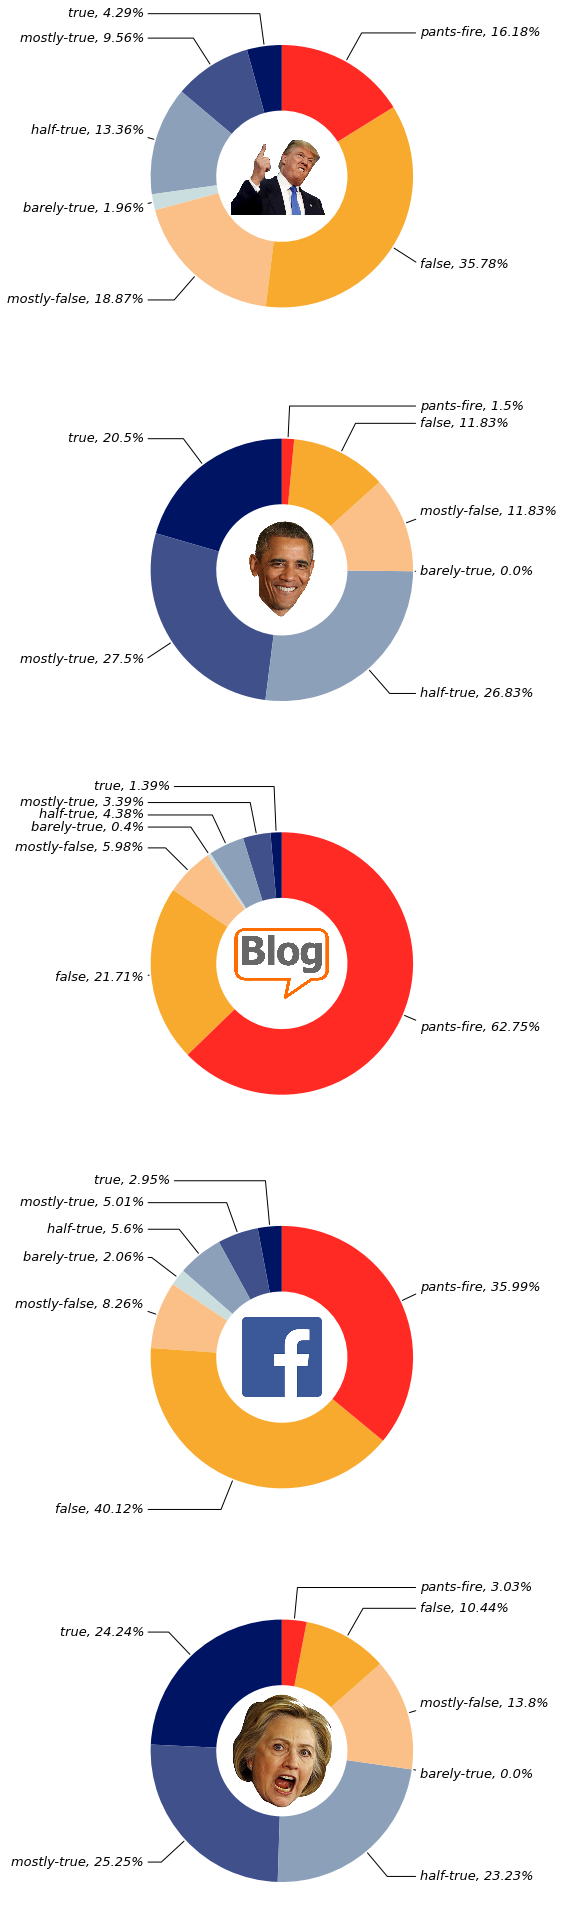

In [28]:
fig, axes = plt.subplots(nrows=5,ncols= 1, figsize=(7,35), subplot_kw=dict(aspect="equal"))

for j, ax in enumerate(axes.flatten()):
    if j == 5:
        break
    values = label_distributions[j]
    colors = ['#ff2a23','#f8aa2f','#fbc088','#cbdedf','#8ca0ba','#40508b','#001464']
    colors = list(reversed(colors))
    wedges, texts = ax.pie(values, wedgeprops=dict(width=0.5), startangle=-270,colors=colors)
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    recipe = [f"{veracity_levels[i]}, {round(values[i],2)}%" for i in range(7)]
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        if j in [2,3] and i == 0:
            ax.annotate(recipe[i], xy=(x, y), xytext=(0.85*np.sign(x), 1.35*y),
                            fontstyle='italic',horizontalalignment=horizontalalignment, **kw,fontsize=13)
        else:
            ax.annotate(recipe[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.25*y),
                            fontstyle='italic',horizontalalignment=horizontalalignment, **kw,fontsize=13)
    

    # insert image in the center of each donut
    img = image_list[j][0]
    m1,m2 = 0,0
    zoom = image_list[j][1]
    ab = AnnotationBbox(OffsetImage(mpimg.imread(img), zoom=zoom), (0,0),frameon=False)
    ax.add_artist(ab)

plt.savefig("label_dist_top5", facecolor="white",bbox_inches='tight', pad_inches=0.2)
plt.show()

In [30]:
# Number of words in the longest statement
data['total_words'].max()

73.0